In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.duplicated().sum()

0

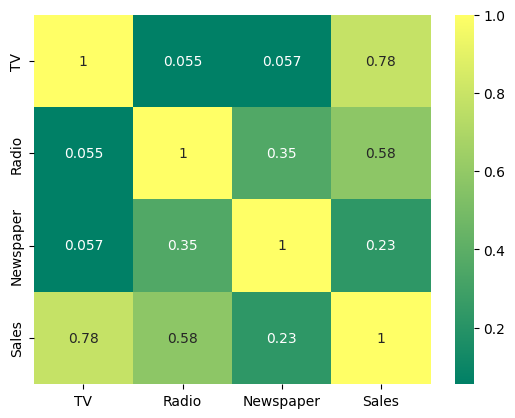

In [9]:
cor=df.corr()
sns.heatmap(cor,annot=True,cmap="summer")
plt.show()

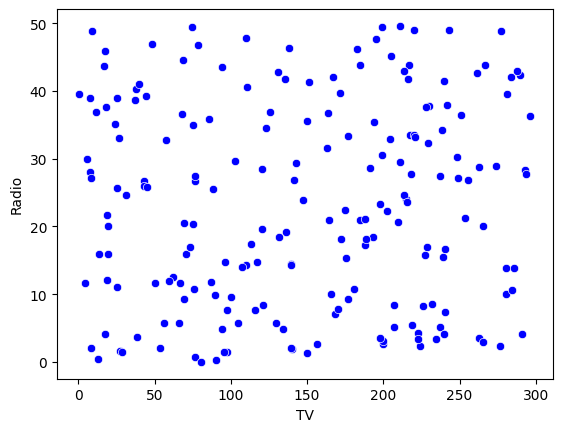

In [10]:
sns.scatterplot(data=df, x="TV", y="Radio",color="blue")
plt.show()

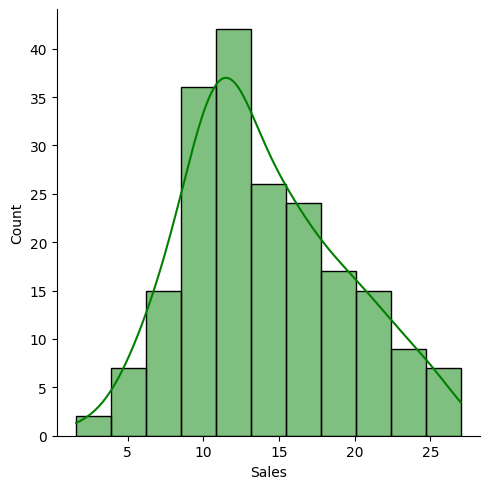

In [11]:
sns.displot(data=df, x="Sales", kde=True,color="green")
plt.show()

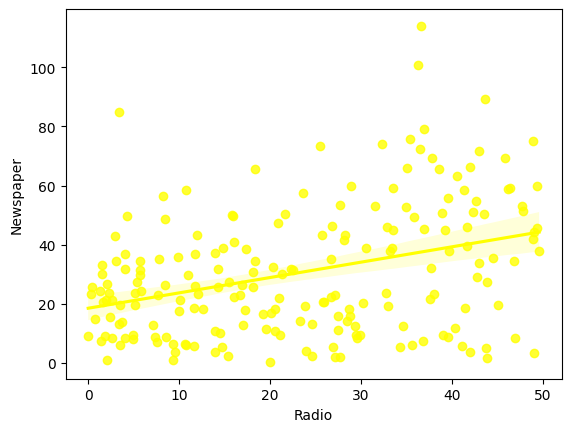

In [12]:
sns.regplot(data=df, x="Radio", y="Newspaper",color="yellow")
plt.show()

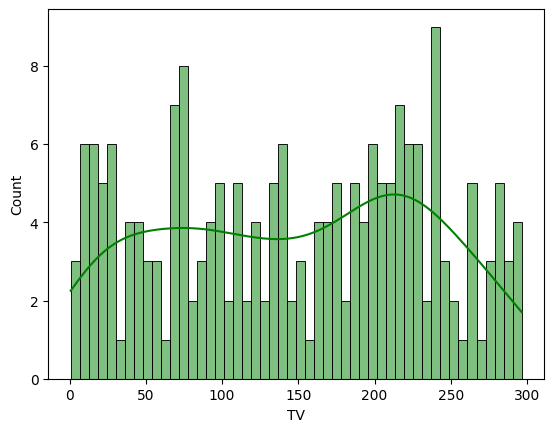

In [13]:
sns.histplot(data=df, x="TV",kde=True,bins=50,color="green")
plt.show()

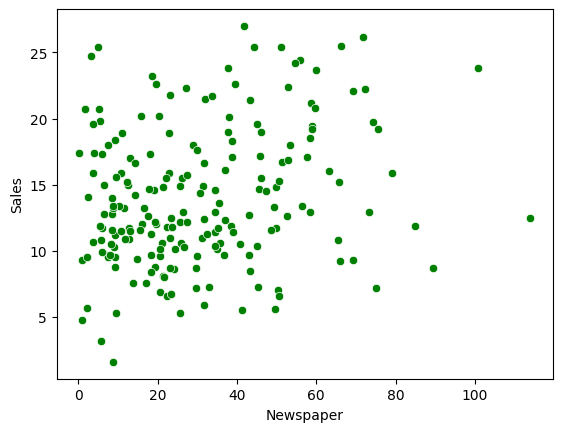

In [14]:
sns.scatterplot(data=df, x="Newspaper", y="Sales",color="green")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col=["TV","Radio","Newspaper"]
df[col]=scaler.fit_transform(df[col])

In [16]:
X=df.drop(columns="Sales",axis=1)
Y=df["Sales"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
pred1=xgb.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.6958691477775573
Mean Squared Error (MSE): 0.679870143529773
R-squared (R2) Score: 0.9784603062339892
Mean Absolute Percentage Error (MAPE): 6.294480115115938


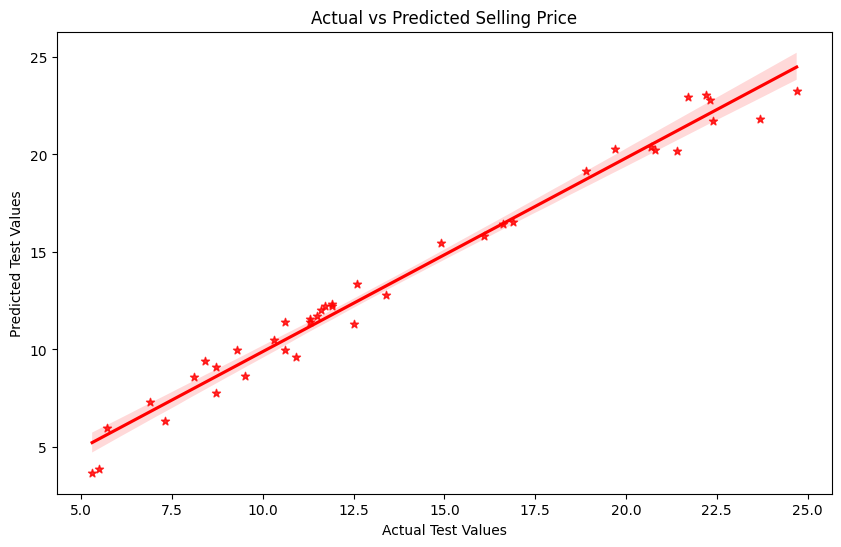

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="red",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

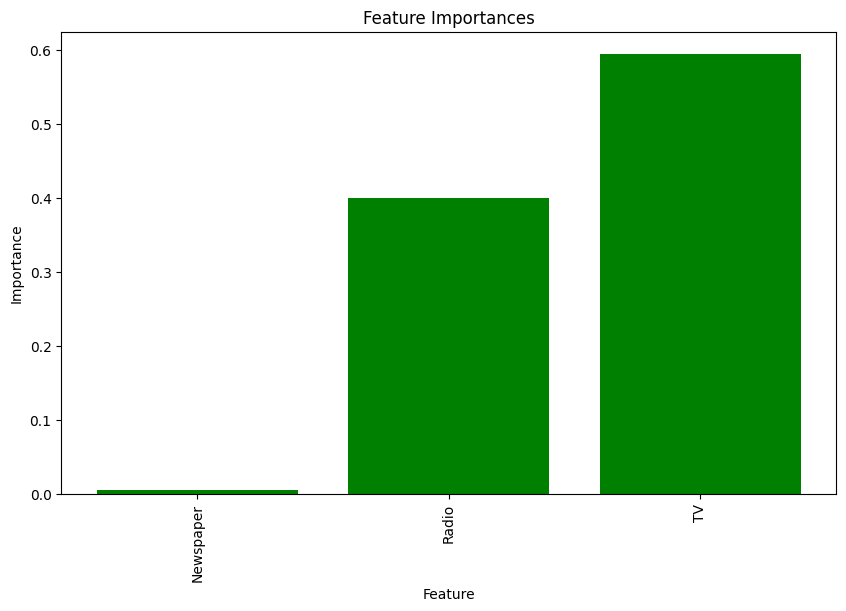

In [21]:
importances = xgb.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="green")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
pred2 = gb.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.6174551419118155
Mean Squared Error (MSE): 0.5308452163831914
R-squared (R2) Score: 0.9831817244706746
Mean Absolute Percentage Error (MAPE): 5.202130070247866


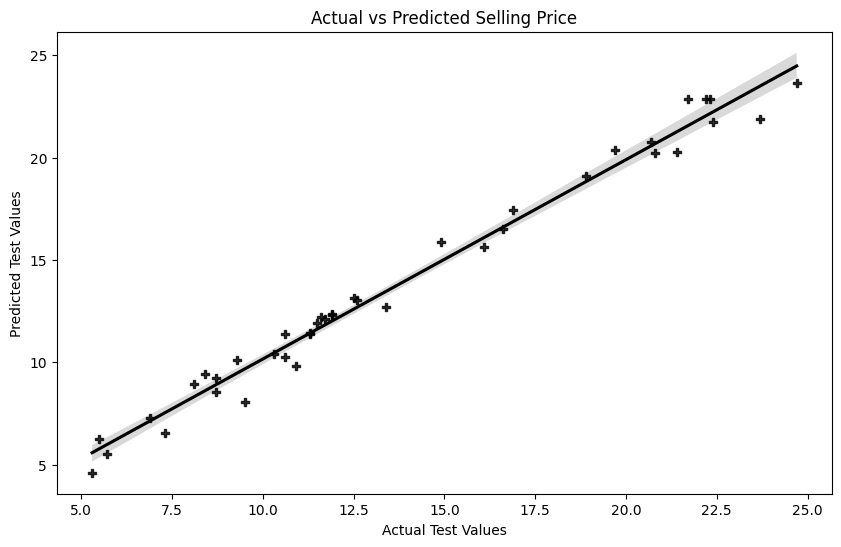

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="black",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

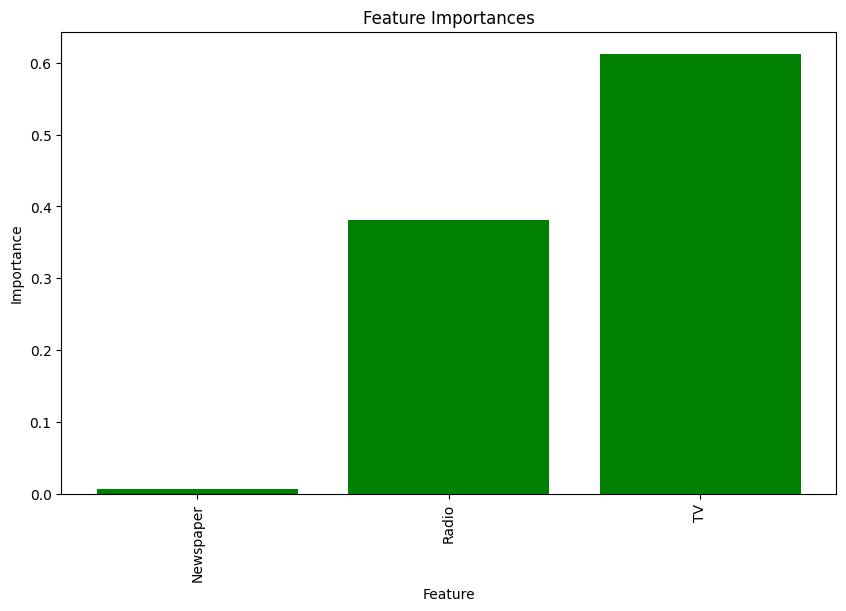

In [25]:
importances = gb.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="green")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred3= rf.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test,pred3)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred3)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred3)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred3)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.6201499999999989
Mean Squared Error (MSE): 0.5908242499999988
R-squared (R2) Score: 0.9812814645037053
Mean Absolute Percentage Error (MAPE): 5.454251286367886


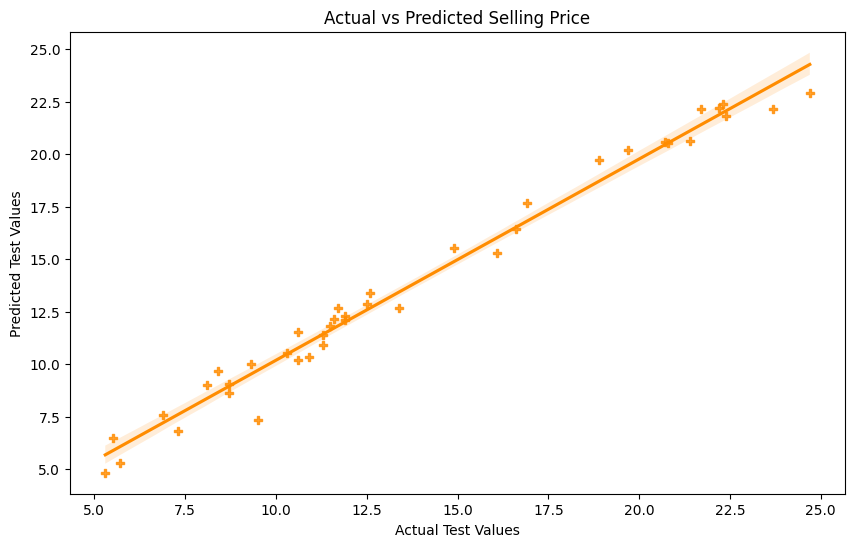

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred3, color="darkorange",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

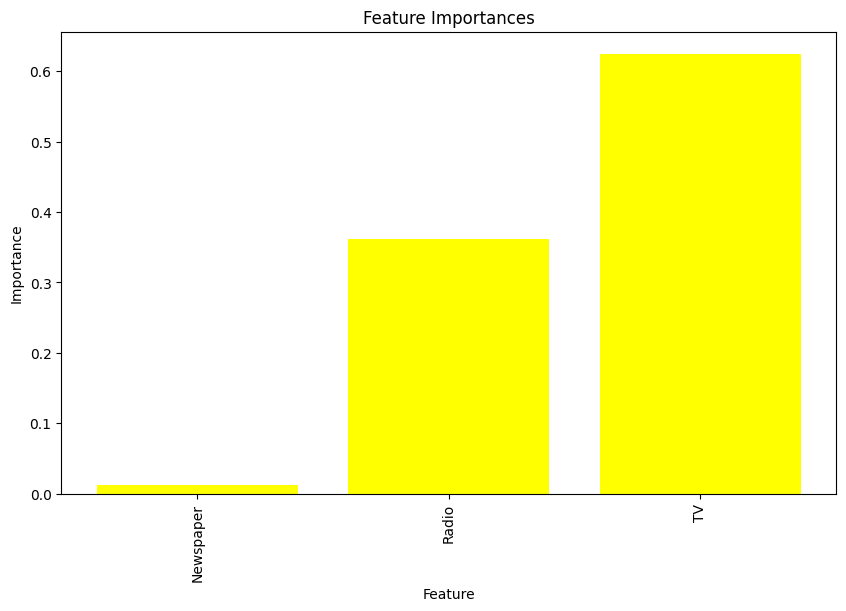

In [29]:
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="yellow")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

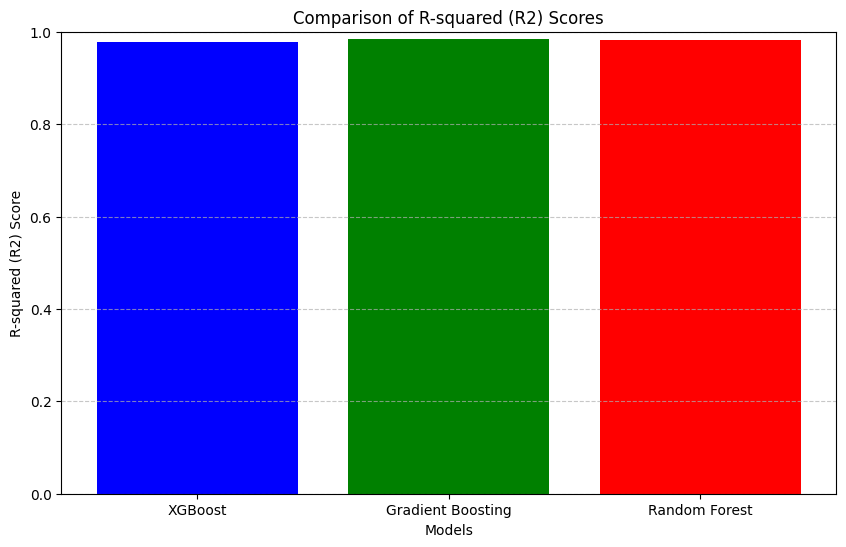

In [30]:
r2_scores = [r2_score(y_test, pred1), r2_score(y_test, pred2), r2_score(y_test, pred3)]
models = ['XGBoost', 'Gradient Boosting', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of R-squared (R2) Scores')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
x_custom = np.array([[0.96, 0.98, 1.77]])
prediction = xgb.predict(x_custom)

print("Prediction:", prediction)

Prediction: [21.702923]
